IMPORT STATEMENTS AND DATASET

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# dataset preparation

from tensorflow.keras import datasets,layers,models

(train_images,train_labels) , (test_images,test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be within 0 , 1
train_images , test_images = train_images/255.0 , test_images/255.0

In [4]:
input_shape = train_images[0].shape

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

Epoch 1/20
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5309 - accuracy: 0.4417 - val_loss: 1.5367 - val_accuracy: 0.4646
Epoch 2/20
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1710 - accuracy: 0.5843 - val_loss: 1.1224 - val_accuracy: 0.5990
Epoch 3/20
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0165 - accuracy: 0.6421 - val_loss: 0.9825 - val_accuracy: 0.6560
Epoch 4/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9195 - accuracy: 0.6773 - val_loss: 0.9559 - val_accuracy: 0.6682
Epoch 5/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8439 - accuracy: 0.7041 - val_loss: 0.9026 - val_accuracy: 0.6897
Epoch 6/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7828 - accuracy: 0.7266 - val_loss: 0.8719 - val_accuracy: 0.7005
Epoch 7/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7337 - accuracy: 0.7441 - val_loss: 0.8932 -

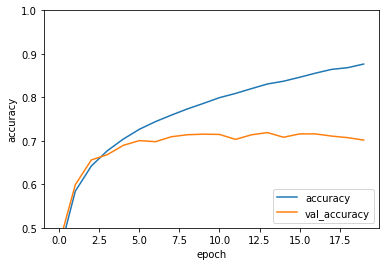

In [6]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

plt.show()

In [7]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 3s - loss: 1.1768 - accuracy: 0.7017
